# Análisis gobiernos emperadores de Roma 

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from src import funciones_soporte as fs

In [2]:
# Importamos el dataset de trabajo, en este caso el csv.
datos_emperadores = pd.read_csv("emperadores_romanos.csv", sep = ",")
datos_emperadores

,nombre,inicio,fin
0,AugustoGaius Iulius Caesar Augustus[a]​,16 de enero de27 a. C.,16 de enero de27 a. C.
1,TiberioTiberius Iulius Caesar,17 de septiembre de14,17 de septiembre de14
2,Calígula[d]​Gaius Iulius Caesar,16 de marzo de37,16 de marzo de37
3,ClaudioTiberius Claudius Caesar,24 de enero de41,24 de enero de41
4,NerónNero Claudius Caesar,13 de octubre de54,13 de octubre de54
...,...,...,...
87,Procopio AntemioProcopius Anthemius,12 de abril de467,12 de abril de467
88,Anicio OlibrioAnicius Olybrius,11 de julio – 2 de noviembre de472,11 de julio – 2 de noviembre de472
89,GlicerioGlicerius,3/5 de marzo de473,3/5 de marzo de473
90,Julio NepoteIulius Nepos,24 de junio de474,24 de junio de474


In [3]:
# Vemos la información general sobre los datos que tenemos en el dataset 
fs.info_df(datos_emperadores)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
nombre,object,92,0,0.0
inicio,object,92,0,0.0
fin,object,92,0,0.0


## **Análisis nombres emperadores de Roma**

In [4]:
# Vamos a ver el numero total de emperadores que ha habido en Roma
numero_emperadores = datos_emperadores["nombre"].count()
print(f"En la historia de Roma ha habido un total de {numero_emperadores} emperadores. \nEs necesario tener en cuenta que estamos en un periodo desde el establecimiento del Principado hasta la caída del Imperio romano de Occidente.")

En la historia de Roma ha habido un total de 92 emperadores. 
Es necesario tener en cuenta que estamos en un periodo desde el establecimiento del Principado hasta la caída del Imperio romano de Occidente.


In [5]:
# Observamos que hay una serie de nombres que contienen caracteres invisibles, coincidentes con \u200b. Comprobamos cuales emperadores lo contienen.
emperadores_corregir = datos_emperadores[datos_emperadores["nombre"].str.contains("\u200b")]
print(emperadores_corregir["nombre"])

0               AugustoGaius Iulius Caesar Augustus[a]​
2                       Calígula[d]​Gaius Iulius Caesar
22    Caracalla[o]​Lucius Septimius Bassianus(Marcus...
25    Heliogábalo[p]​Sex.Varius Avitus Bassianus(Mar...
51    Constancio I"Cloro"Marcus Flavius Valerius Con...
77         Constantino IIIFl. Claudius Constantinus[y]​
78                                    Constante II[aa]​
91                Rómulo AugústuloRomulus Augustus[ae]​
Name: nombre, dtype: object


In [6]:
fs.limpieza_caracteres(datos_emperadores, "nombre")

In [7]:
print(datos_emperadores["nombre"].iloc[56])

LicinioValerius Licinianus Licinus


In [8]:
# Los mismos elementos que contienen caracteres invisibles, contienen elementos con [] y una letra en su interior.
elementos = ["[a]", "[d]","[o]","[p]","[w]","[y]","[aa]","[ae]"] 
for emperador in datos_emperadores["nombre"]:
    for i in elementos:
        if i in emperador:
            # emperador = emperador.replace(i, "")
            print(emperador)

In [9]:
# Comprobamos que solo tenemos nombres de emperadores en la columna de nombre
datos_emperadores["nombre"].unique()

array(['AugustoGaius Iulius Caesar Augustus',
       'TiberioTiberius Iulius Caesar', 'CalígulaGaius Iulius Caesar',
       'ClaudioTiberius Claudius Caesar', 'NerónNero Claudius Caesar',
       'GalbaServius Sulpicius Galba', 'OtónMarcus Salvius Otho',
       'VitelioAulus Vitellius', 'VespasianoTitus Flavius Vespasianus',
       'TitoTitus Flavius Vespasianus',
       'DomicianoTitus Flavius Domitianus', 'NervaMarcus Cocceius Nerva',
       'TrajanoMarcus Ulpius Traianus', 'AdrianoPublius Aelius Hadrianus',
       'Antonino PíoTitus Aurelius Antoninus',
       'Lucio VeroLucius Aelius Commodus(Lucius Aurelius Verus)',
       'Marco AurelioMarcus Annius Verus(Marcus Aurelius Antoninus)',
       'CómodoLucius Aurelius Commodus',
       'PertinaxPublius Helvius Pertinax',
       'Didio JulianoMarcus Didius Iulianus',
       'Septimio SeveroLucius Septimius Severus',
       'GetaPublius Septimus Geta',
       'CaracallaLucius Septimius Bassianus(Marcus Aurelius Antoninus)',
       'Macri

## **Fechas inicio y fin gobernanza emperadores**


In [11]:
# Creamos nuevas columnas en las que realizaremos las modificaciones de las fechas para poder trabajar con ellas al final
datos_emperadores["inicio_gobernanza"] = datos_emperadores["inicio"]
datos_emperadores["fin_gobernanza"] = datos_emperadores["fin"]

In [11]:
datos_emperadores.head(2)

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza
0,AugustoGaius Iulius Caesar Augustus,16 de enero de27 a. C.,16 de enero de27 a. C.,16 de enero de27 a. C.,16 de enero de27 a. C.
1,TiberioTiberius Iulius Caesar,17 de septiembre de14,17 de septiembre de14,17 de septiembre de14,17 de septiembre de14


### Fechas inicio

In [12]:
datos_emperadores["inicio_gobernanza"].unique()

array(['16 de enero de27 a. C.', '17 de septiembre de14',
       '16 de marzo de37', '24 de enero de41', '13 de octubre de54',
       '8 de junio de 68', '15 de enero–16 de abril de 69',
       '19 de abril–20/22 de diciembre de 69', '1 de julio de69',
       '24 de junio de79', '14 de septiembre de81',
       '18 de septiembre de96', '28 de enero de98', '11 de agosto de117',
       '10 de julio de138', '7 de marzo de161', '17 de marzo de180',
       '31 de diciembre de 192', '28 de marzo–2 de junio de 193',
       '9 de abril de193[m]\u200b', '4 de febrero de211',
       '12 de abril de217', 'c.16 de mayo –c.8 de junio de 218',
       '16 de mayo de218', '13 de marzo de222', 'c. marzo de 235',
       'c.marzo – abril de 238', 'c. julio de 238', 'c. febrero de 244',
       'c. septbre de 249', 'c. junio de 251',
       'c. julio – septiembre de 253', '—', 'c. septiembre 253',
       'c. julio de 260', 'septiembre 268', '270', 'c. mayo 270',
       'c.270 – septiembre/octubre 275', 'c. 

Problemas encontrados en las fechas de inicio:
- Existencia de caracteres invisibles.
- Existencia de letras o expresiones como: .c, a.C., ¿?
- Hay fechas que contienen guiones, ya que hacen referencia al periodo de gobernanza entero.
- Caracteres "de" que tendremos que eliminar.
- Fechas en formato object, que habrá que modificar para poder trabajar con ellas.

A continuación realizamos la limpieza de esta columna para poder finalmente tranasformarla en tipo fecha. 

Caracteres invisibles

In [13]:
# Observamos que hay una serie de nombres que contienen caracteres invisibles, coincidentes con \u200b. Comprobamos que fechas lo contienen.
datos_emperadores[datos_emperadores["inicio_gobernanza"].str.contains("\u200b")]

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza
20,Septimio SeveroLucius Septimius Severus,9 de abril de193[m]​,9 de abril de193[m]​,9 de abril de193[m]​,9 de abril de193[m]​
85,MayorianoIulius Valerius Maiorianus,28 de diciembrede457[ab]​,28 de diciembrede457[ab]​,28 de diciembrede457[ab]​,28 de diciembrede457[ab]​


In [14]:
fs.limpieza_caracteres(datos_emperadores, "inicio_gobernanza")

Caracteres: [ ], "c.", "c. ", "¿?"

In [15]:
# Los mismos elementos que contienen caracteres invisibles, contienen elementos con [] y una letra en su interior.
elementos1 = ["[m]", "[ab]", "c.", "c. ", "¿", "?"]
for fecha in datos_emperadores["inicio_gobernanza"]:
    for i in elementos1:
        if i in fecha:
            # emperador = emperador.replace(i, "")
            print(fecha)

Elementos "de"

In [16]:
fs.limpieza_fechas(datos_emperadores, "inicio_gobernanza")

In [27]:
datos_emperadores["fecha_prueba"] = datos_emperadores["inicio_gobernanza"].str.split("-").str[1]

In [28]:
datos_emperadores

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza,fecha_prueba,fecha_inicio1
0,AugustoGaius Iulius Caesar Augustus,16 de enero de27 a. C.,16 de enero de27 a. C.,16 enero 27 a. C.,16 de enero de27 a. C.,NaN,NaN
1,TiberioTiberius Iulius Caesar,17 de septiembre de14,17 de septiembre de14,17 septiembre 14,17 de septiembre de14,NaN,NaN
2,CalígulaGaius Iulius Caesar,16 de marzo de37,16 de marzo de37,16 marzo 37,16 de marzo de37,NaN,NaN
3,ClaudioTiberius Claudius Caesar,24 de enero de41,24 de enero de41,24 enero 41,24 de enero de41,NaN,NaN
4,NerónNero Claudius Caesar,13 de octubre de54,13 de octubre de54,13 octubre 54,13 de octubre de54,NaN,NaN
...,...,...,...,...,...,...,...
87,Procopio AntemioProcopius Anthemius,12 de abril de467,12 de abril de467,12 abril 467,12 de abril de467,NaN,NaN
88,Anicio OlibrioAnicius Olybrius,11 de julio – 2 de noviembre de472,11 de julio – 2 de noviembre de472,11 julio – 2 noviembre 472,11 de julio – 2 de noviembre de472,NaN,NaN
89,GlicerioGlicerius,3/5 de marzo de473,3/5 de marzo de473,3/5 marzo 473,3/5 de marzo de473,NaN,NaN
90,Julio NepoteIulius Nepos,24 de junio de474,24 de junio de474,24 junio 474,24 de junio de474,NaN,NaN


Valores con la fecha de inicio y fin en la entrada

In [17]:
# Tenemos una serie de celdas que contienen directamente la fecha de inicio y fin de la gobernanza de los emperadores. Estas entradas se 
# caracterizan por tener las fechas separadas por un guión, ya sea con espacios como sin espacios, hay patrones. Por ello, para poder hallar
# estas fechas hacemos uso de las expresiones regulares que en este caso son: \s–\s, las \s hacen referencia a los espacios, por lo que hallaremos
# aquellas entradas que contienen espacios ya sea antes o después del guión; \w-\w estas hacen referencia a los guiones que estén seguidos de todo tipo
# de caracteres, de cualquier
datos_emperadores[datos_emperadores["inicio_gobernanza"].str.contains(r"(\s–\s|–\s|\s–|\w-\w)")]

C:\Users\gabri\AppData\Local\Temp\ipykernel_7916\1539084327.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  datos_emperadores[datos_emperadores["inicio_gobernanza"].str.contains(r"(\s–\s|–\s|\s–|\w-\w)")]


,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza
24,Diadumeniano,c.16 de mayo –c.8 de junio de 218,c.16 de mayo –c.8 de junio de 218,16 mayo –8 junio 218,c.16 de mayo –c.8 de junio de 218
28,Gordiano IGordiano II,c.marzo – abril de 238,c.marzo – abril de 238,marzo – abril 238,c.marzo – abril de 238
33,EmilianoMarcus Aemilus Aemilianus,c. julio – septiembre de 253,c. julio – septiembre de 253,julio – septiembre 253,c. julio – septiembre de 253
41,Ulpia Severina,c.270 – septiembre/octubre 275,c.270 – septiembre/octubre 275,270 – septiembre/octubre 275,c.270 – septiembre/octubre 275
43,FlorianoMarcus Annius Florianus,c. junio – septiembre 276,c. junio – septiembre 276,junio – septiembre 276,c. junio – septiembre 276
63,VetraniónVetranio,1 de marzo – 25 de diciembre de 350,1 de marzo – 25 de diciembre de 350,1 marzo – 25 diciembre 350,1 de marzo – 25 de diciembre de 350
72,Víctor,384 – 388,384 – 388,384 – 388,384 – 388
80,Constancio IIIConstantius,8 de febrero – 2 de septiembre de421,8 de febrero – 2 de septiembre de421,8 febrero – 2 septiembre 421,8 de febrero – 2 de septiembre de421
83,Petronio MáximoPetronius Maximus,17 de marzo – 31 de mayo de455,17 de marzo – 31 de mayo de455,17 marzo – 31 mayo 455,17 de marzo – 31 de mayo de455
88,Anicio OlibrioAnicius Olybrius,11 de julio – 2 de noviembre de472,11 de julio – 2 de noviembre de472,11 julio – 2 noviembre 472,11 de julio – 2 de noviembre de472


In [23]:
datos_emperadores["inicio_gobernanza"].unique()

array(['16  enero 27 a. C.', '17  septiembre 14', '16  marzo 37',
       '24  enero 41', '13  octubre 54', '8  junio  68',
       '15  enero–16  abril  69', '19  abril–20/22  diciembre  69',
       '1  julio 69', '24  junio 79', '14  septiembre 81',
       '18  septiembre 96', '28  enero 98', '11  agosto 117',
       '10  julio 138', '7  marzo 161', '17  marzo 180',
       '31  diciembre  192', '28  marzo–2  junio  193', '9  abril 193',
       '4  febrero 211', '12  abril 217', '16  mayo –8  junio  218',
       '16  mayo 218', '13  marzo 222', ' marzo  235',
       'marzo – abril  238', ' julio  238', ' febrero  244',
       ' septbre  249', ' junio  251', ' julio – septiembre  253', '—',
       ' septiembre 253', ' julio  260', 'septiembre 268', '270',
       ' mayo 270', '270 – septiembre/octubre 275', ' noviembre 275',
       ' junio – septiembre 276', ' junio 276', ' septiembre 282',
       ' septiembre 283', '20  noviembre 284', '1  abril 286',
       '1  mayo 305', '25  julio  30

### Fechas fin

In [15]:
datos_emperadores["fin_gobernanza"].unique()

array(['16 de enero de27 a. C.', '17 de septiembre de14',
       '16 de marzo de37', '24 de enero de41', '13 de octubre de54',
       '8 de junio de 68', '15 de enero–16 de abril de 69',
       '19 de abril–20/22 de diciembre de 69', '1 de julio de69',
       '24 de junio de79', '14 de septiembre de81',
       '18 de septiembre de96', '28 de enero de98', '11 de agosto de117',
       '10 de julio de138', '7 de marzo de161', '17 de marzo de180',
       '31 de diciembre de 192', '28 de marzo–2 de junio de 193',
       '9 de abril de193[m]\u200b', '4 de febrero de211',
       '12 de abril de217', 'c.16 de mayo –c.8 de junio de 218',
       '16 de mayo de218', '13 de marzo de222', 'c. marzo de 235',
       'c.marzo – abril de 238', 'c. julio de 238', 'c. febrero de 244',
       'c. septbre de 249', 'c. junio de 251',
       'c. julio – septiembre de 253', '—', 'c. septiembre 253',
       'c. julio de 260', 'septiembre 268', '270', 'c. mayo 270',
       'c.270 – septiembre/octubre 275', 'c. 

En las fechas de fin nos encontramos con los mismos problemas que en las fechas de inicio.A continuación tratamos estos problemas. 

Caracteres invisibles

In [ ]:
# Observamos que hay una serie de nombres que contienen caracteres invisibles, coincidentes con \u200b. Comprobamos que fechas lo contienen.
datos_emperadores[datos_emperadores["fin_gobernanza"].str.contains("\u200b")]

In [17]:
fs.limpieza_caracteres_invisibles(datos_emperadores, "fin_gobernanza")

In [ ]:
# Observamos que hay una serie de nombres que contienen caracteres invisibles, coincidentes con \u200b. Comprobamos que fechas lo contienen.
datos_emperadores[datos_emperadores["fin_gobernanza"].str.contains("\u200b")]

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza


Caracteres [ ], "c.", "c. " y otros

In [29]:
# Los mismos elementos que contienen caracteres invisibles, contienen elementos con [] y una letra en su interior.
elementos2 = ["[r]", "[n]", "[z]", "[ac]", "[ad]", "c.", "c. ","(en Italia)"]
for fecha in datos_emperadores["fin_gobernanza"]:
    for i in elementos2:
        if i in fecha:
            # emperador = emperador.replace(i, "")
            print(fecha)

c.16 de mayo –c.8 de junio de 218
c. marzo de 235
c. marzo de 235
c.marzo – abril de 238
c. julio de 238
c. julio de 238
c. febrero de 244
c. febrero de 244
c. septbre de 249
c. septbre de 249
c. junio de 251
c. junio de 251
c. julio – septiembre de 253
c. julio – septiembre de 253
c. septiembre 253
c. septiembre 253
c. septiembre 253
c. septiembre 253
c. julio de 260
c. julio de 260
c. mayo 270
c. mayo 270
c.270 – septiembre/octubre 275
c. noviembre 275
c. noviembre 275
c. junio – septiembre 276
c. junio – septiembre 276
c. junio 276
c. junio 276
c. septiembre 282
c. septiembre 282
c. septiembre 283
c. septiembre 283
c. septiembre 283
c. septiembre 283
c.18 de enero de350


In [30]:
# Eliminamos los caracteres
for i in elementos2:
	datos_emperadores["fin_gobernanza"] = datos_emperadores["fin_gobernanza"].apply(lambda x: x.replace(i, "") if i in x else x)

Valores nulos

In [31]:
# Al modificar el tipo de dato de la columna, los valores nulos han pasado a contener un "nan" en su lugar. Comprobamos que son los mismos valores
# que los sacados anteriormente.
datos_emperadores[datos_emperadores["fin_gobernanza"] == "nulo"]

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza


Cambiamos las entradas que contienen una frase

In [32]:
for fecha_fin in datos_emperadores["fin_gobernanza"]:
    if len(fecha_fin) > 35:
        print(fecha_fin)

19 de abril–20/22 de diciembre de 69
8 de febrero – 2 de septiembre de421


In [32]:
# Para aquellas entradas que contienen frases vamos a reemplazarlas por la palabra "nulo"
datos_emperadores["fin_gobernanza"] = datos_emperadores["fin_gobernanza"].apply(lambda x: "nulo" if len(x) > 35 else x)

Caracteres "de"

In [33]:
# Eliminamos los "de" dentro de las fechas
datos_emperadores["fin_gobernanza"] = datos_emperadores["fin_gobernanza"].str.replace("de", "")

In [34]:
# Al modificar el tipo de dato de la columna, los valores nulos han pasado a contener un "nan" en su lugar. Comprobamos que son los mismos valores
# que los sacados anteriormente.
datos_emperadores[datos_emperadores["fin_gobernanza"] == "nulo"] 

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza
6,OtónMarcus Salvius Otho,15 de enero–16 de abril de 69,Proclamado emperador por laGuardia Pretoriana....,15 enero–16 abril 69,nulo
7,VitelioAulus Vitellius,19 de abril–20/22 de diciembre de 69,Proclamado por las legiones germanas delRinen ...,19 abril–20/22 diciembre 69,nulo
19,Didio JulianoMarcus Didius Iulianus,28 de marzo–2 de junio de 193,Compró el título a los pretorianos. Fue recono...,28 marzo–2 junio 193,nulo
24,Diadumeniano,c.16 de mayo –c.8 de junio de 218,"Hijo y co-emperador de Macrino, quien lo procl...",16 mayo –8 junio 218,nulo
28,Gordiano IGordiano II,c.marzo – abril de 238,Gobernadores deÁfrica; proclamados por el Sena...,marzo – abril 238,nulo
29,Pupieno MáximoCalvino Balbino,c.abril – julio de 238,Antiguos senadores proclamados por el Senado e...,abril – julio 238,nulo
32,Filipo el Joven,247 – 249,"Co-emperador de Filipo, asociado al trono con ...",247 – 249,nulo
34,Herenio Etrusco,c. mayo – junio de 251,"Hijo y co-emperador de Decio, asesinado junto ...",mayo – junio 251,nulo
35,Hostiliano,c. junio – julio de 251,"Hijo menor de Decio, proclamado co-emperador p...",junio – julio 251,nulo
37,VolusianoGaius Vibius Volusianus,c. agosto de 251 – agosto de 253,"Hijo de Treboniano Galo, proclamado co-emperad...",agosto 251 – agosto 253,nulo


In [35]:
datos_emperadores.loc[datos_emperadores["fin_gobernanza"] == "nulo", "fin_gobernanza"] = datos_emperadores["inicio_gobernanza"].str.extract(r"(\s–\s|–\s|\s–|\w-\w)(.+)$")[1]

In [36]:
datos_emperadores.loc[datos_emperadores["fin_gobernanza"] == "nulo", "fin_gobernanza"] = datos_emperadores["inicio_gobernanza"].str.extract(r"(\s–\s|–\s|\s–|\w-\w)(.+)$")[1]

In [38]:
pattern = r"(^.+?)(\s–\s|–\s|\s–|\w-\w)"

# Paso 1: Extraer la primera parte antes del guion solo si coincide con el patrón
datos_emperadores["inicio_gobernanza"] = datos_emperadores["inicio_gobernanza"].apply(lambda x: x if pd.isna(pd.Series(x).str.extract(pattern)[0].iloc[0]) else pd.Series(x).str.extract(pattern)[0].iloc[0])

In [39]:
datos_emperadores

,nombre,inicio,fin,inicio_gobernanza,fin_gobernanza
0,AugustoGaius Iulius Caesar Augustus,16 de enero de27 a. C.,19 de agosto de14,16 enero 27 a. C.,19 agosto 14
1,TiberioTiberius Iulius Caesar,17 de septiembre de14,16 de marzo de37,17 septiembre 14,16 marzo 37
2,CalígulaGaius Iulius Caesar,16 de marzo de37,24 de enero de41,16 marzo 37,24 enero 41
3,ClaudioTiberius Claudius Caesar,24 de enero de41,13 de octubre de54,24 enero 41,13 octubre 54
4,NerónNero Claudius Caesar,13 de octubre de54,9 de junio de68,13 octubre 54,9 junio 68
...,...,...,...,...,...
93,Procopio AntemioProcopius Anthemius,12 de abril de467,11 de julio de472,12 abril 467,11 julio 472
94,Anicio OlibrioAnicius Olybrius,11 de julio – 2 de noviembre de472,"Miembro de lagens Anicia, una de las familias ...",11 julio,2 noviembre 472
95,GlicerioGlicerius,3/5 de marzo de473,24 de junio[ad]​ de474,3/5 marzo 473,24 junio 474
96,Julio NepoteIulius Nepos,24 de junio de474,28 de agosto de475(en Italia),24 junio 474,28 agosto 475


In [44]:
datos_emperadores["inicio_gobernanza"].unique()

array(['16  enero 27 a. C.', '17  septiembre 14', '16  marzo 37',
       '24  enero 41', '13  octubre 54', '8  junio  68',
       '15  enero–16  abril  69', '19  abril–20/22  diciembre  69',
       '1  julio 69', '24  junio 79', '14  septiembre 81',
       '18  septiembre 96', '28  enero 98', '11  agosto 117',
       '10  julio 138', '7  marzo 161', '17  marzo 180',
       '31  diciembre  192', '28  marzo–2  junio  193', '9  abril 193',
       '4  febrero 211', '12  abril 217', '16  mayo', '16  mayo 218',
       '13  marzo 222', ' marzo  235', 'marzo', 'abril', ' julio  238',
       ' febrero  244', '247', ' septbre  249', ' mayo', ' junio',
       ' junio  251', ' agosto  251', ' julio', '—', ' septiembre 253',
       ' julio  260', 'septiembre 268', '270', ' mayo 270',
       ' noviembre 275', ' junio 276', ' septiembre 282',
       ' septiembre 283', '20  noviembre 284', '1  abril 286',
       '1  mayo 305', '25  julio  306', '25  julio 306',
       '28  octubre 306', '1  mayo 310',

Cambio a tipo fecha de las columnas inicio y fin, y creacion de la duración del gobierno

In [38]:
# datos_emperadores["años gobernanza"] = datos_emperadores["fin"] - datos_emperadores["inicio"]

In [39]:
#datos_emperadores["inicio_gobernanza"] = pd.to_datetime(datos_emperadores["inicio_gobernanza"], errors = "coerce")

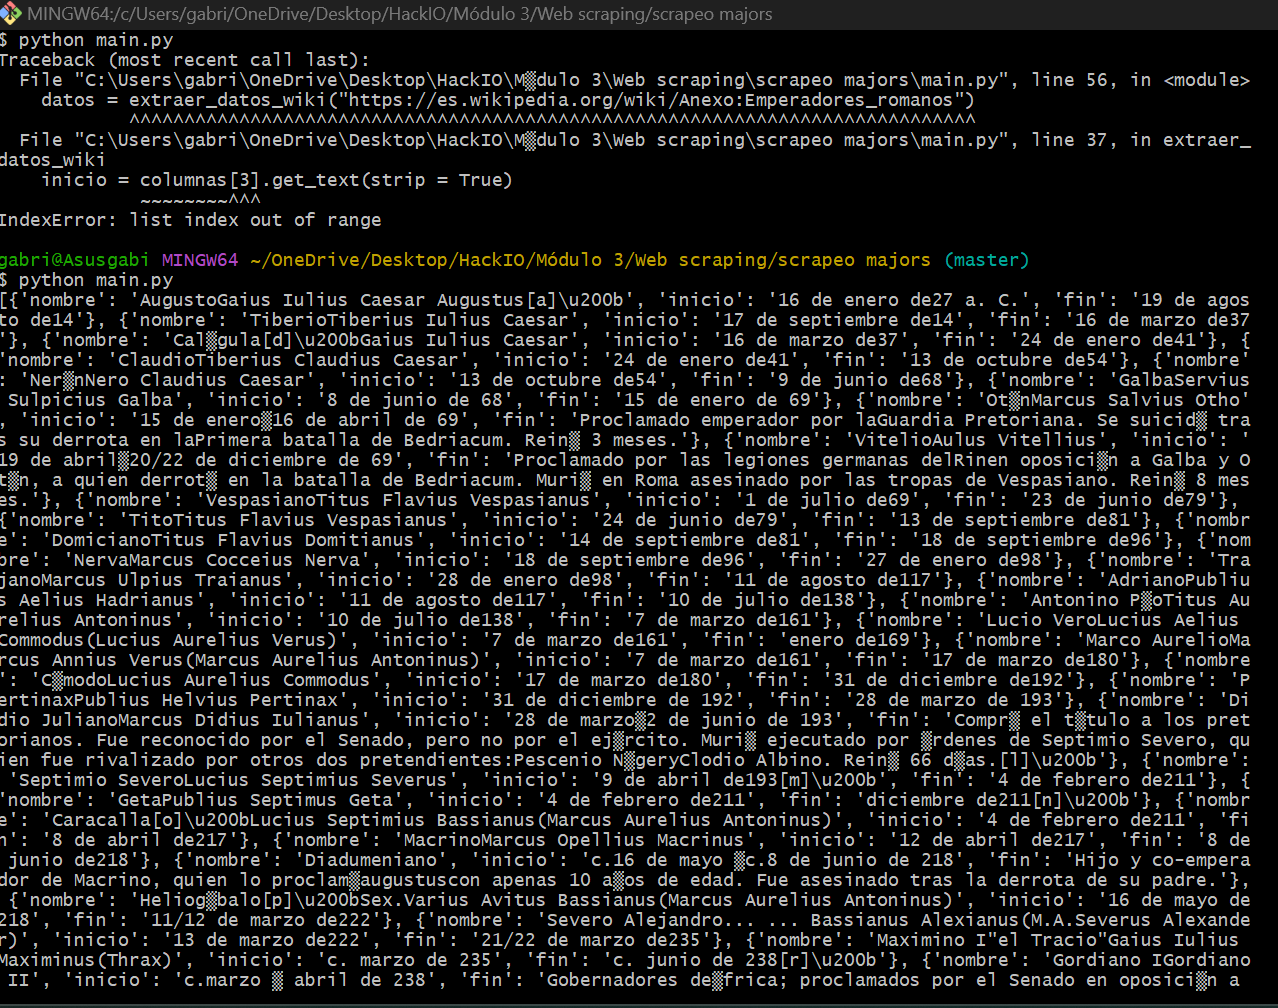